In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

In [24]:
palm = pd.read_csv("palm_ffb.csv")

In [25]:
palm.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [26]:
palm.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [27]:
palm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [28]:
palm.isnull().any()

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

In [29]:
palm.shape

(130, 9)

* Summary
* number of rows/index = 130, number of column = 9
* No missing or null data inside the dataset

## Time Series Plot

In [30]:
#Change Date format
palm["Date"] = pd.to_datetime(palm["Date"], format="%d.%m.%Y")
print(palm["Date"])

0     2008-01-01
1     2008-02-01
2     2008-03-01
3     2008-04-01
4     2008-05-01
         ...    
125   2018-06-01
126   2018-07-01
127   2018-08-01
128   2018-09-01
129   2018-10-01
Name: Date, Length: 130, dtype: datetime64[ns]


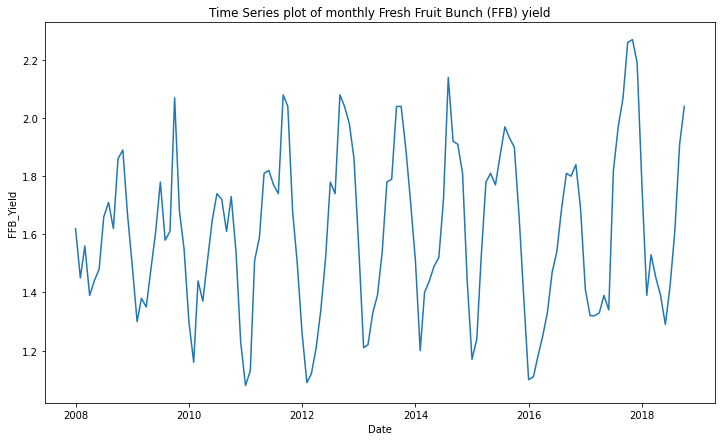

In [31]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(x=palm["Date"], y=palm["FFB_Yield"])
ax.set_title("Time Series plot of monthly Fresh Fruit Bunch (FFB) yield")
plt.show()

* This dataset have about 11 years of data which is from 2008 until 2018.
* The number of peaks are also nearly 11.
* This indicates every years also have a strong seasonality.

In [32]:
palm["Year"]  = palm["Date"].dt.year
palm["Month"] = palm["Date"].dt.month

* To have the FFB_Yield by year and month

In [33]:
year_df_dict = dict(tuple(palm.groupby("Year")))
year_df_dict.keys()

dict_keys([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [34]:
cmap = plt.cm.get_cmap('RdYlGn')

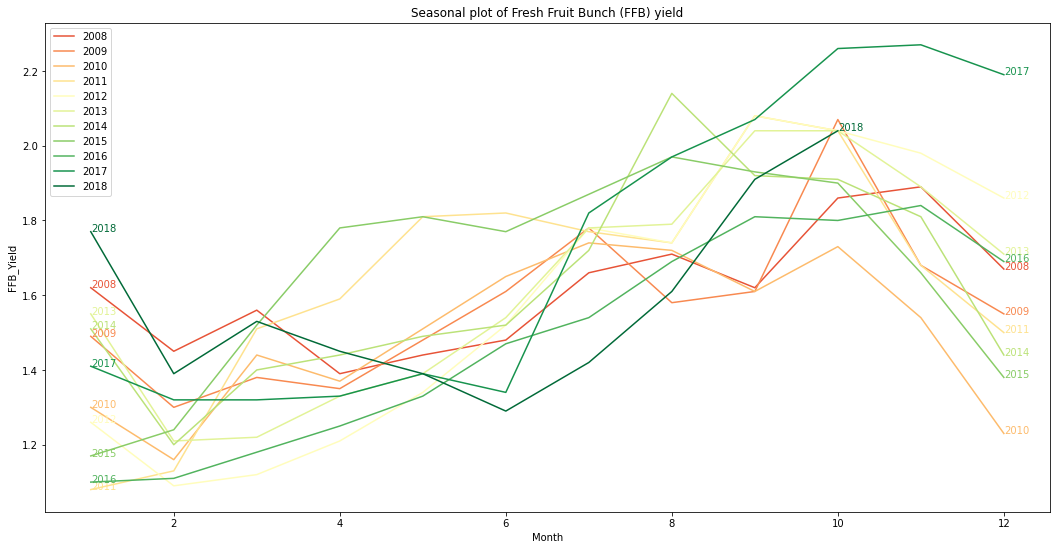

In [35]:
fig, ax = plt.subplots(figsize=(18, 9))
for idx, key in enumerate(year_df_dict.keys()):
    color_idx = (idx / 12) + 0.16
    temp = year_df_dict[key]
    sns.lineplot(x=temp["Month"], y=temp["FFB_Yield"], label=key, ax=ax, color=cmap(color_idx))
    plt.text(temp["Month"].values[-1], temp["FFB_Yield"].values[-1], key, color=cmap(color_idx))
    plt.text(temp["Month"].values[0], temp["FFB_Yield"].values[0], key, color=cmap(color_idx))
ax.set_title("Seasonal plot of Fresh Fruit Bunch (FFB) yield")
plt.show()

* From plot by month and year, the pattern of the FFB_Yield is not obvious.
* Through the years, it show lower FFB_Yield at beginning of the year, increases until about October, then decrease from October 
  to December.

In [36]:
palm= palm.drop(columns=["Year", "Month"])

* Drop Year and Month columns

In [37]:
temp_df = palm.set_index("Date")

In [38]:
temp_df['FFB_Yield']

Date
2008-01-01    1.62
2008-02-01    1.45
2008-03-01    1.56
2008-04-01    1.39
2008-05-01    1.44
              ... 
2018-06-01    1.29
2018-07-01    1.42
2018-08-01    1.61
2018-09-01    1.91
2018-10-01    2.04
Name: FFB_Yield, Length: 130, dtype: float64

* Prepare a copy of the dataframe for chart plotting using month_plot function in statsmodel

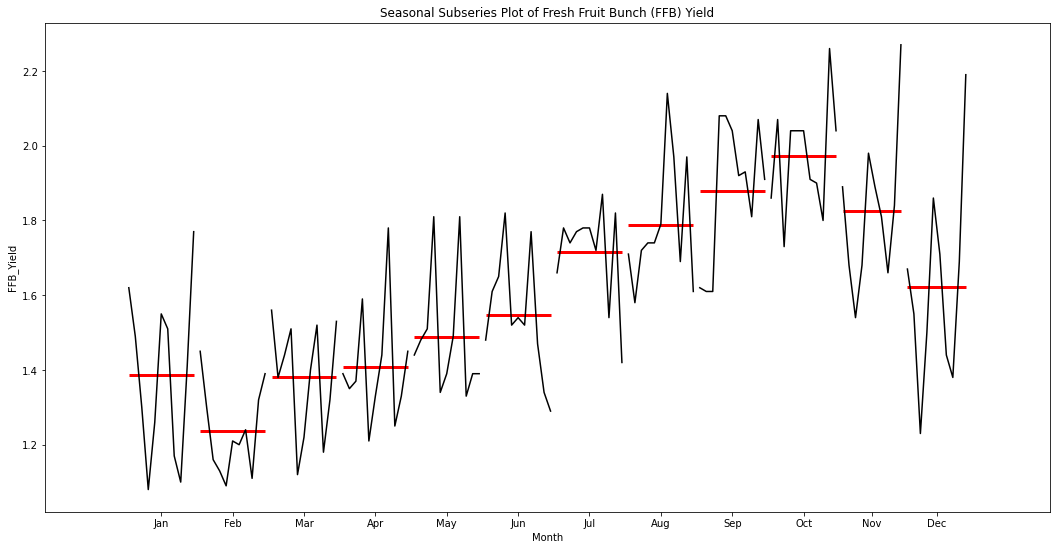

In [39]:

fig, ax = plt.subplots(figsize=(18, 9))
month_plot(temp_df['FFB_Yield'], ylabel='FFB_Yield', ax=ax)
ax.set_xlabel("Month")
ax.set_title("Seasonal Subseries Plot of Fresh Fruit Bunch (FFB) Yield")
plt.show()

* Highest FFB yield is in between Sep - Nov, whereas lowest FFB yield in between Jan - Mar.

## Correlation Analysis

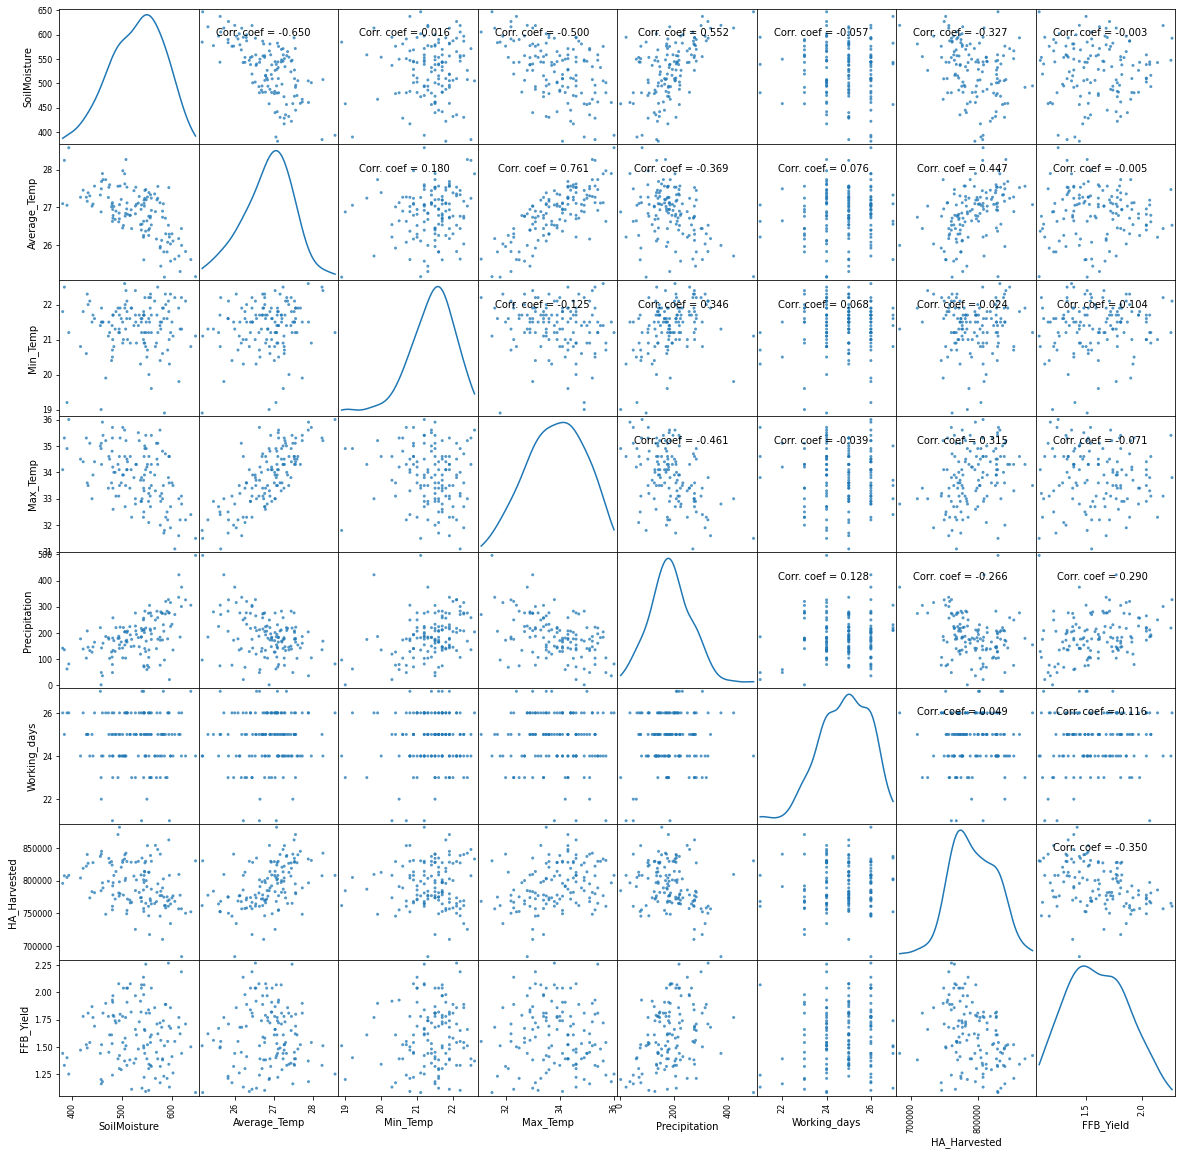

In [40]:
ax=pd.plotting.scatter_matrix(palm, alpha=0.75, diagonal='kde', figsize=[20,20])
corrs = palm.corr().values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.8), xycoords='axes fraction', ha='right', va='baseline')
plt.show() 

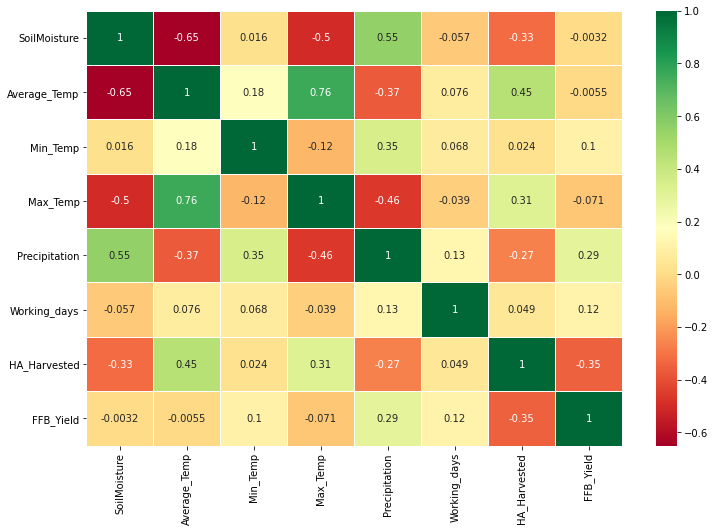

In [41]:
#Using Pearson Correlation
sns.heatmap(palm.corr(),annot=True,cmap='RdYlGn',linewidths=1)
figure=plt.gcf()
figure.set_size_inches(12,8)
plt.show()

* FFB Yield shows strong negative correlation with HA_Harvested and strong positive correlation with min_temp, working days and   precipitation

## Normality Check

In [42]:
from scipy.stats import shapiro

In [43]:
# We want to test normality for independent variables
not_normal_x_list = []
normal_x_list = []

for col in palm.columns[1:-1]:
    stat, p = shapiro(palm[col])
    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))

    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Normal (fail to reject H0)')
        normal_x_list.append(col)
        
    else:
        print('Sample does not look Normal (reject H0)')
        not_normal_x_list.append(col) 

print(f"\nnot_normal_x_list : {not_normal_x_list}")
print(f"normal_x_list : {normal_x_list}")

SoilMoisture
Statistics=0.982, p=0.084
Sample looks Normal (fail to reject H0)
Average_Temp
Statistics=0.984, p=0.137
Sample looks Normal (fail to reject H0)
Min_Temp
Statistics=0.932, p=0.000
Sample does not look Normal (reject H0)
Max_Temp
Statistics=0.986, p=0.203
Sample looks Normal (fail to reject H0)
Precipitation
Statistics=0.978, p=0.037
Sample does not look Normal (reject H0)
Working_days
Statistics=0.912, p=0.000
Sample does not look Normal (reject H0)
HA_Harvested
Statistics=0.986, p=0.192
Sample looks Normal (fail to reject H0)

not_normal_x_list : ['Min_Temp', 'Precipitation', 'Working_days']
normal_x_list : ['SoilMoisture', 'Average_Temp', 'Max_Temp', 'HA_Harvested']


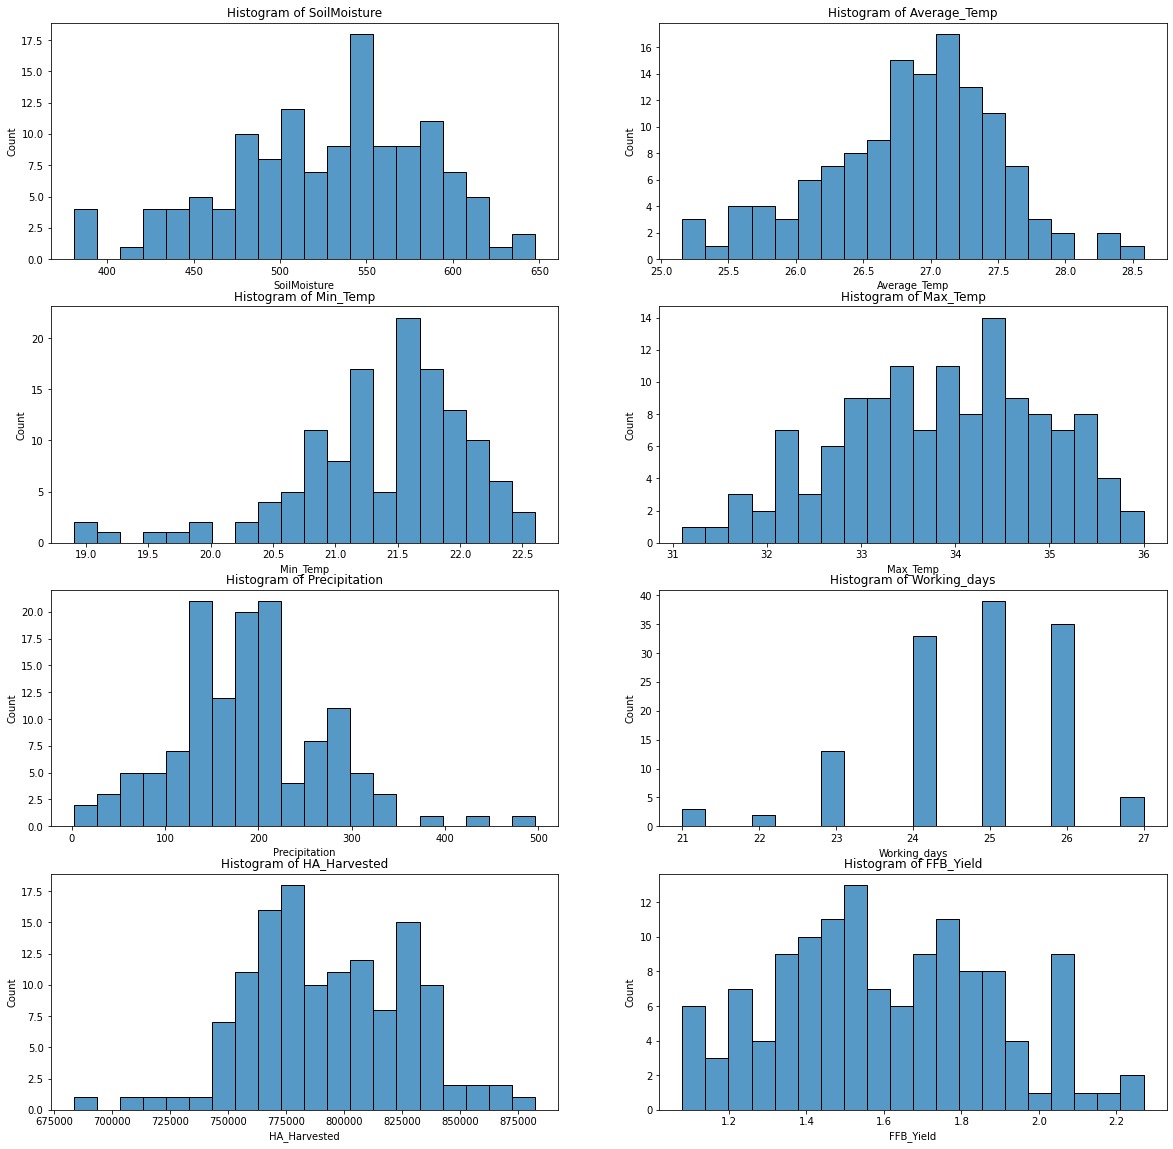

In [44]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.ravel()
for idx, col in enumerate(palm.columns[1:]):
    sns.histplot(data=palm, x=col, ax=axes[idx], bins=20)
    axes[idx].set_title(f"Histogram of {col}")

* Based on the result of normality tests, we can also compared them with the histograms.

In [45]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

In [46]:
# Standardized-data dataframe
std_palm = palm.copy() 

In [47]:
for col in std_palm.columns[1:]:
    std_palm[col] = (std_palm[col] - std_palm[col].mean()) / (std_palm[col].std())

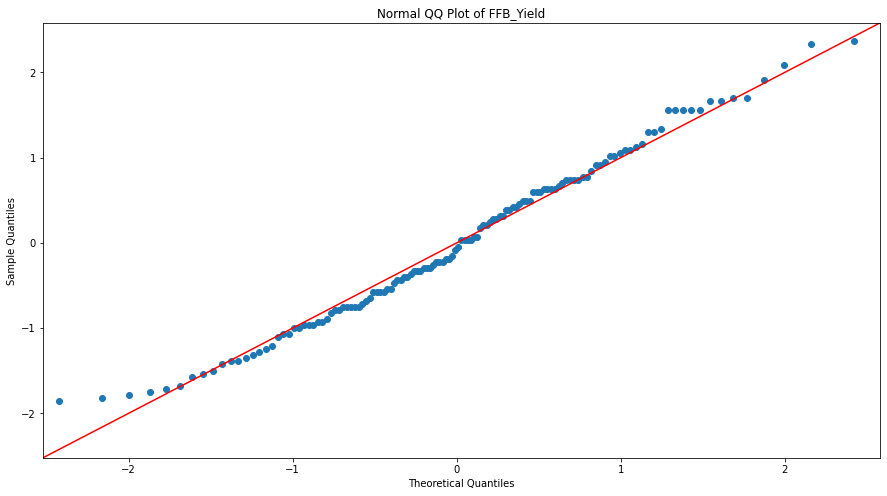

In [48]:
fig, ax = plt.subplots(figsize=(15, 8))
sm.qqplot(std_palm["FFB_Yield"], line ='45', ax=ax)
plt.title("Normal QQ Plot of FFB_Yield")
plt.show()

In [49]:
shapiro(std_palm["FFB_Yield"])

ShapiroResult(statistic=0.9826724529266357, pvalue=0.09629825502634048)

* Normality check on column FFB_Yield show that it is following normal distribution.

## Regression Analysis

In [50]:
palm.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,2008-02-01,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,2008-03-01,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,2008-04-01,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,2008-05-01,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


#### Separate Into Independent and Dependent Variables

In [51]:
X = palm.drop('Date',axis=1).drop('FFB_Yield',axis=1)
y = palm['FFB_Yield']

#### Train Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=923)

#### Modeling

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [56]:
print("Intercept: ", LR.intercept_)
print("Coefficients:")
list(zip(X, LR.coef_))

Intercept:  2.8405677183729523
Coefficients:


[('SoilMoisture', -0.0016143073929628968),
 ('Average_Temp', 0.029440394891592336),
 ('Min_Temp', 0.03212737629867904),
 ('Max_Temp', 0.013159329244570266),
 ('Precipitation', 0.0009002480856599872),
 ('Working_days', 0.0060691954496558285),
 ('HA_Harvested', -3.3124908011619714e-06)]

In [57]:
#Print the regression equation with all the coefficient values

print("Regression Equation is\n")
print(f"FFB_Yield = \n{LR.intercept_:3f} ", end="")
for feature, coef in zip(X, LR.coef_):
    if coef >= 0:
        print(f"+{coef:6f} {feature}", end=" ")
    else:
        print(f"{coef:6f} {feature}", end=" ")
print("+ error")

Regression Equation is

FFB_Yield = 
2.840568 -0.001614 SoilMoisture +0.029440 Average_Temp +0.032127 Min_Temp +0.013159 Max_Temp +0.000900 Precipitation +0.006069 Working_days -0.000003 HA_Harvested + error


In [58]:
#Prediction on train set
y_pred_train = LR.predict(X_train)
y_pred_train

array([1.54816637, 1.52666443, 1.51218818, 1.22954665, 1.63202317,
       1.50853759, 1.64294357, 1.60431712, 1.42568404, 1.49615574,
       1.59970306, 1.66031777, 1.69796595, 1.54958126, 1.46546815,
       1.46395294, 1.47724091, 1.54471012, 1.66755135, 1.73463235,
       1.87482739, 1.74539858, 1.39127477, 1.55922839, 1.50470885,
       1.66723234, 1.48262588, 1.72479346, 1.5819353 , 1.54834946,
       1.77765533, 1.95340019, 1.76650334, 1.57799696, 1.89148939,
       1.67775972, 1.64489905, 1.57962149, 1.67069816, 1.36415784,
       1.70274986, 1.79233957, 1.67238949, 1.43122419, 1.78596174,
       1.29539012, 1.60240122, 1.92591319, 1.53688672, 1.66188316,
       1.463544  , 1.71056986, 1.85173902, 1.3632555 , 1.43993594,
       1.81650574, 1.4949693 , 1.58455022, 1.56741485, 1.48412182,
       1.60739187, 1.73865137, 1.62815866, 1.37167077, 1.60603846,
       1.5889887 , 1.63500894, 1.52983469, 1.65993672, 1.64165122,
       1.47006573, 1.68764586, 1.51831496, 1.42921348, 1.62620

In [59]:
#Prediction on test set
y_pred_test = LR.predict(X_test)
y_pred_test

array([1.53271352, 1.6051576 , 1.66146537, 1.7147147 , 1.7565764 ,
       1.63294572, 1.52573859, 1.57979925, 1.61557408, 1.46874035,
       1.60904199, 1.67717769, 1.7204599 , 1.5130317 , 1.41364951,
       1.83809825, 1.82183685, 1.53378405, 1.45010384, 1.55476477,
       1.71684593, 1.79800046, 1.69396919, 1.52175696, 1.72012195,
       1.787653  , 1.54055635, 1.54676922, 1.63459403, 1.54325674,
       1.68483014, 1.60320928, 1.600013  , 1.64181487, 1.69665646,
       1.59627133, 1.49904667, 1.45530166, 1.5477182 ])

In [60]:
#Actual and predicted values for train set
LR_train = pd.DataFrame({'Actual value': y_train, 
                         'Predicted value': y_pred_train})
LR_train.head()

,Actual value,Predicted value
8,1.62,1.548166
42,1.77,1.526664
32,1.61,1.512188
37,1.13,1.229547
74,1.40,1.632023


In [61]:
#Actual and predicted values for test set
LR_test= pd.DataFrame({'Actual value': y_test, 
                       'Predicted value': y_pred_test})
LR_test.head()

,Actual value,Predicted value
120,1.77,1.532714
21,2.07,1.605158
69,2.04,1.661465
70,1.89,1.714715
99,1.25,1.756576


#### Model Evaluation

In [62]:
from sklearn import metrics

In [63]:
print('R squared: {:.2f}'.format(LR.score(X,y)*100))

R squared: 21.85


In [64]:
#For train set
meanAbErr_train = metrics.mean_absolute_error(y_train, y_pred_train)
meanSqErr_train = metrics.mean_squared_error(y_train, y_pred_train)
rootMeanSqErr_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))

print('Mean Absolute Error:', meanAbErr_train)
print('Mean Square Error:', meanSqErr_train)
print('Root Mean Square Error:', rootMeanSqErr_train)

Mean Absolute Error: 0.19215041622944407
Mean Square Error: 0.05585348205493637
Root Mean Square Error: 0.23633341290417734


In [65]:
#For test set
meanAbErr_test = metrics.mean_absolute_error(y_test, y_pred_test)
meanSqErr_test = metrics.mean_squared_error(y_test, y_pred_test)
rootMeanSqErr_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('Mean Absolute Error:', meanAbErr_test)
print('Mean Square Error:', meanSqErr_test)
print('Root Mean Square Error:', rootMeanSqErr_test)

Mean Absolute Error: 0.21495648544175452
Mean Square Error: 0.07488046390912667
Root Mean Square Error: 0.2736429496791881


* The value of R Square is 21.85, which indicates that 21.85% of the data fit the regression model.

* The mean absolute error, mean square error and root mean square error obtained are close to zero in both train and test set,  
  which is pretty good. The errors in test set only increased a little compared to train set.

* However, because the R Square is too low, the model might be underfit. Maybe linear regression is not a suitable model. A       better model which will take 'Date' into consideration might be better.